# Imports Needed

In [69]:
import numpy as np
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# Data

In [70]:
# Loading mnist dataset from keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [71]:
# categorizing dateset into either (0,1,...9)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Prepare Data

In [72]:
# Normalize data (0.0-1.0)
x_train = x_train / 255.0
x_test = x_test / 255.0

#Reshape Data, from 28x28 to 784x1
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# Creating Model - CNN

In [73]:
# Init sequential model
model = Sequential()

# Adding a fully connected layer with 512 neurons and ReLU activation function to a flattened image
model.add(Dense(units=512, input_shape=[784,], activation='relu')) # 128
model.add(Dense(units=512, activation='relu'))

# Add a dropout layer with dropout rate of 25%
model.add(Dropout(0.25))

# Add the output layer with 10 neurons (corresponding to 10 classes) and softmax activation function
model.add(Dense(units=10, activation='softmax'))

# Compile the model with categorical crossentropy loss function, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

# Training

In [74]:
# Creating Batch Size and Epochs to train model
batch_size = 512 # 512
epochs=10 # 10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)



Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8075 - loss: 0.6677
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9605 - loss: 0.1339
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9734 - loss: 0.0873
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9828 - loss: 0.0585
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9882 - loss: 0.0401
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9921 - loss: 0.0281
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9928 - loss: 0.0233
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9956 - loss: 0.0160
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9956 - loss: 0.0154
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9975 - loss: 0.0096


# Evaluating

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.9780 - loss: 0.0767
Test Loss: 0.0625663474202156 Test Accuracy: 0.982200026512146


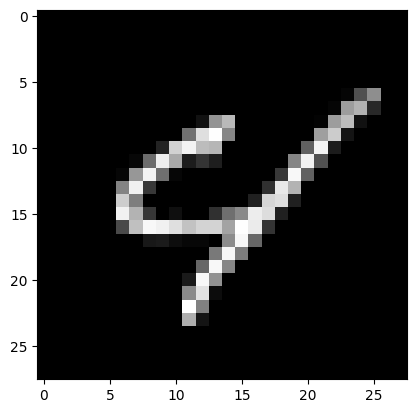

In [75]:
# Test Loss Accuracy with test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss, "Test Accuracy:", test_acc)

# Image Example
plt.imshow(x_test[420].reshape(28,28), cmap='gray')

In [76]:
# Example of how the prediction will be outputed
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
[[7.9761255e-09 2.1995112e-09 1.4002643e-07 ... 9.9999559e-01
  1.4701875e-09 1.3424817e-07]
 [3.7437649e-09 3.4910875e-07 9.9999928e-01 ... 1.5820587e-10
  3.3521980e-07 2.3473212e-15]
 [3.6037042e-07 9.9985743e-01 1.4464598e-06 ... 1.2422794e-04
  3.1221457e-06 2.3373335e-08]
 ...
 [2.7299417e-15 4.0910365e-11 3.4377235e-16 ... 8.6275271e-09
  4.4169673e-10 2.5184239e-08]
 [1.5661208e-11 1.3540618e-12 9.3961695e-15 ... 1.7296799e-11
  1.0433048e-06 6.8384019e-13]
 [3.1958953e-11 2.2077917e-14 9.6620032e-13 ... 9.9036882e-16
  1.1054998e-12 1.0530917e-13]]
[7 2 1 ... 4 5 6]


# Testing With Python Program image

['test_0.png', 'test_1.png', 'test_2.png', 'test_3.png', 'test_4.png', 'test_5.png', 'test_6.png', 'test_7.png', 'test_8.png', 'test_9.png']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[3]


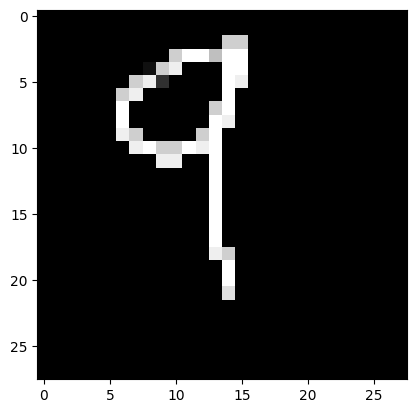

In [77]:
# Testing with Test Images from folder TestImages
import os
from PIL import ImageOps, Image

folder_path = 'TestImages/'
image_files = [file for file in os.listdir(folder_path) if file.endswith((".png"))]
print(image_files)
for image_file in image_files:
    img = Image.open('TestImages/'+image_file)
    img = ImageOps.invert(img)
    img = img.convert('L')  
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, -1)  
    prediction = model.predict(img_array)
    print(np.argmax(prediction, axis=1))
    plt.imshow(img_array.reshape(28,28), cmap='gray')


In [78]:
# Saving model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# Saving weights to HDF5
model.save_weights("model.weights.h5")
print("Saved model to disk")

Saved model to disk
